<a href="https://colab.research.google.com/github/tanishka-26saxena/Spam-Threat-Detection/blob/main/Spam_Threat_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , StandardScaler , MinMaxScaler , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.model_selection import GridSearchCV

#Library for LightGBM
from lightgbm import LGBMClassifier

# Data Loading


In [ ]:
train_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [ ]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


# exploratory Data analysis

In [ ]:
train_data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [ ]:
train_data.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [ ]:
# Identifying categorical and numerical columns

cat_cols = train_data.select_dtypes(include=['object']).columns
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
#columns in the dataset
train_data.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

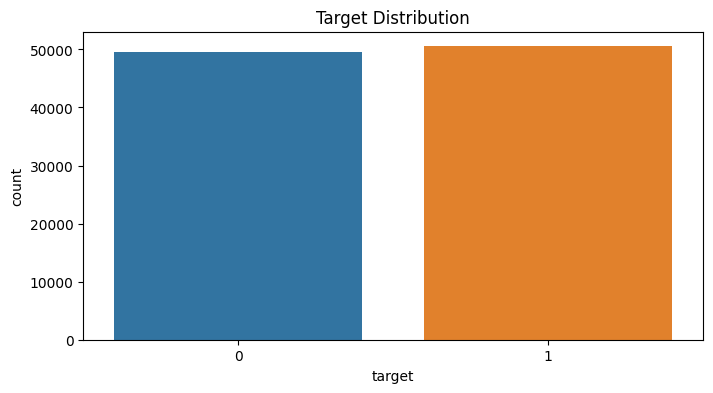

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=train_data)
plt.title('Target Distribution')
plt.show()

**Target distribution insights**
* The above bar chart reveals that the dataset has **balanced** target classes that reduces bias.
* This gives the flexibility to choose variety of models without specifically handling the imbalance.

# System security features distribution

**NumAntiVirusProductsInstalled and NumAntivirusProductsEnabled on target distribution**

In [ ]:
cols = ['NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled']

train_data.groupby('target')[cols].agg({
    'NumAntivirusProductsInstalled': ['mean', 'median',
                                       ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))],
    'NumAntivirusProductsEnabled': ['mean', 'median',
                                     ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))]
})

NumAntivirusProductsInstalled             NumAntivirusProductsEnabled  \
                                mean median  IQR                        mean   
target                                                                         
0                           1.406199    1.0  1.0                    1.024786   
1                           1.248554    1.0  0.0                    1.011881   

                    
       median  IQR  
target              
0         1.0  0.0  
1         1.0  0.0

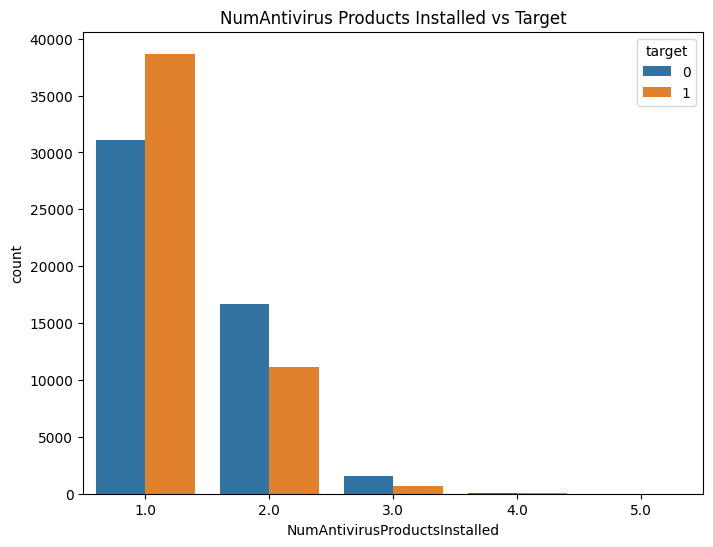

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='NumAntivirusProductsInstalled', hue='target', data=train_data)
plt.title('NumAntivirus Products Installed vs Target')
plt.show()

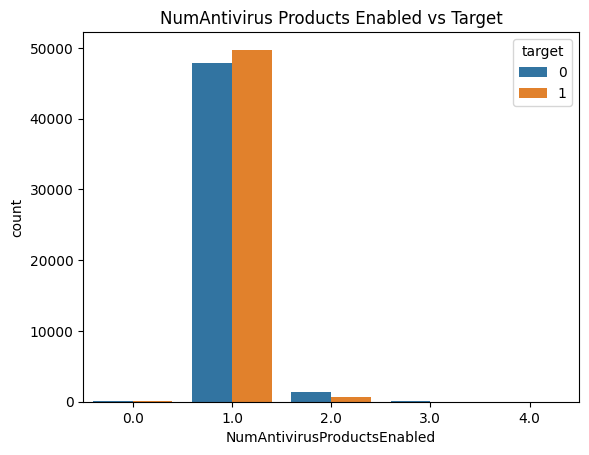

In [ ]:
sns.countplot(x='NumAntivirusProductsEnabled',hue= 'target', data=train_data)
plt.title('NumAntivirus Products Enabled vs Target')
plt.show()

**Effect of NumAntiVirusProductsInstalled and NumAntivirusProductsEnabled on target distribution**
* System without threats have slightly more antivirus products installed on average.
* The number of enabled antivirus products is almost the same for both groups, suggesting that installation alone doesn't guarantee protection.
* A small number of systems have more than one antivirus product installed or enabled, but this does not provide noticeable protection benefits.

# Operating System features distribution

****OS Branch on target distribution****

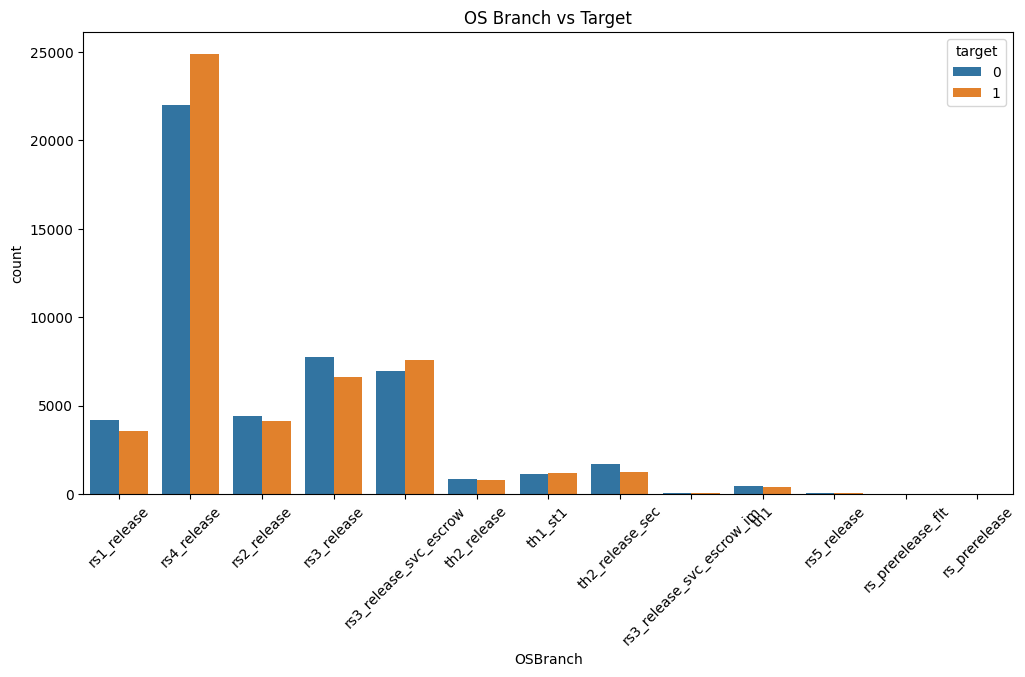

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OSBranch', hue='target', data=train_data)
plt.xticks(rotation=45)
plt.title('OS Branch vs Target')
plt.show()

**Observations :**
* RS4 Release: 25,000 systems were infected (target=1) and 22,000 systems were not infected (target=0).
* RS3 Release: 8,000 systems were infected and 7,000 systems were not infected.
* RS2 Release: 4,000 systems were infected and 4,500 systems were not infected.
* Low Usage Branches: Other branches like RS5 Release and RS3 SVC Escrow have fewer than 1,000 systems.

**Insights :**
* The RS4 release has the highest number of both infected and non-infected systems.
* In RS4 and RS3 releases, infections (target=1) are slightly higher.
  

****OS Edition on target distribution****

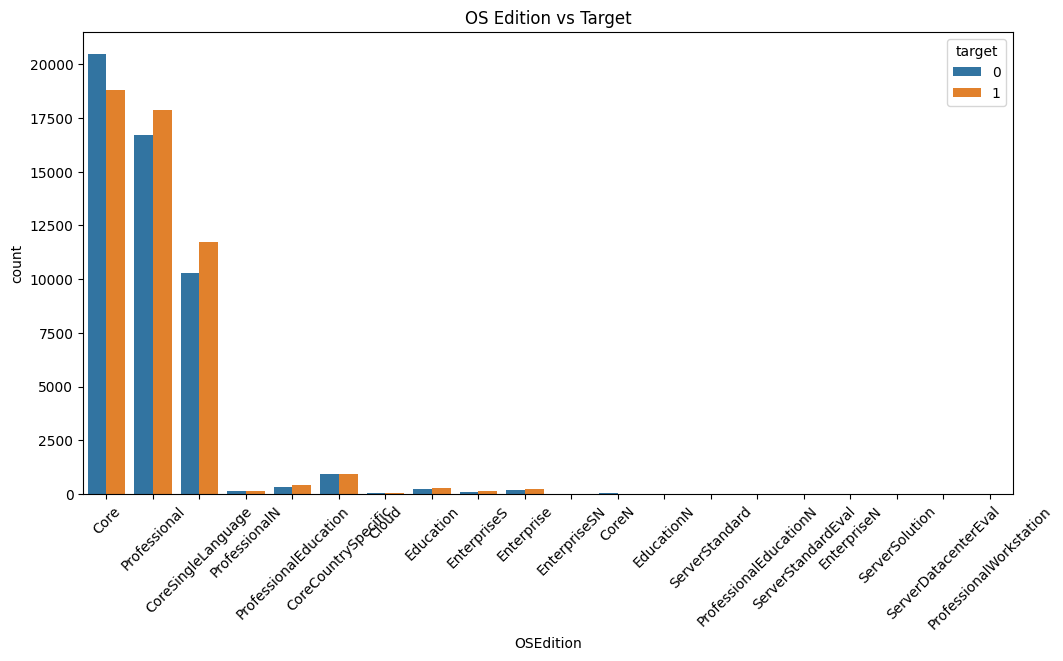

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OSEdition', hue='target', data=train_data)
plt.xticks(rotation=45)
plt.title('OS Edition vs Target')
plt.show()

**Observations :**
* Core Edition: Around 20,000 systems dont have system threats (target=0) while around 18,000 systems have system threats (target=1).
* Professional : Systems with and without threats are nearly balanced, with around 17,000 infected and 18,000 not infected.
* Core Single Language : Around 10,000 systems were not infected while around 12,000 systems were infected.

**Insights :**
* Professional and Core Single Language have relatively higher number of threats(target=1).
* Core edition have highest number of threats among other editions however relatively it has lesser threats.
* Other editions have lessser threats significantly.

# System Configuration features distribution

**Processor core count on target distribution**

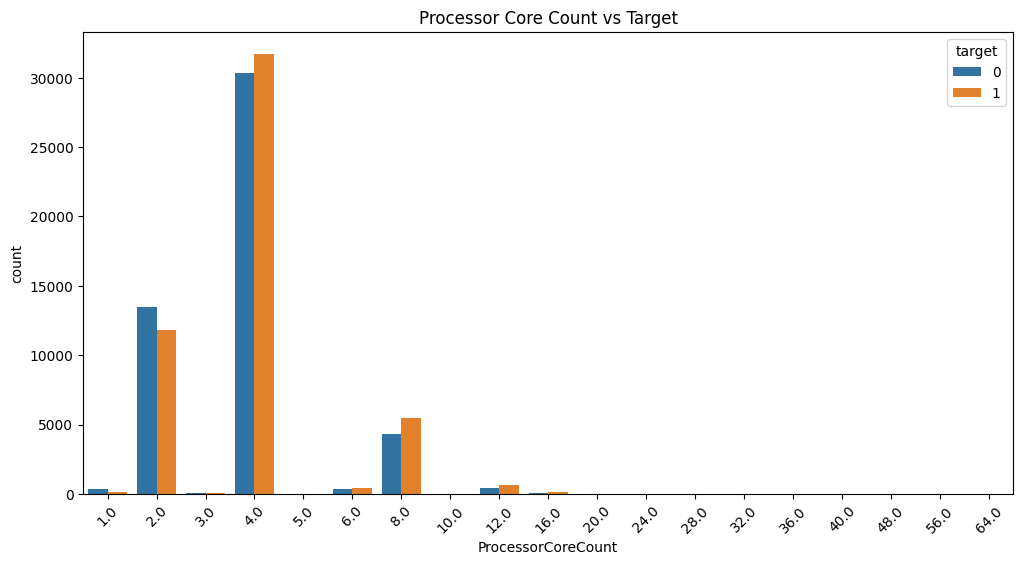

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ProcessorCoreCount', hue='target', data=train_data)
plt.xticks(rotation=45)
plt.title('Processor Core Count vs Target')
plt.show()

**Observations :**
* 4-Core Processors: Around 30,000 have system threats and 32,000 infected systems have 4-core processors.
* 2-Core Processors: Around 13,000 dont have system threats and 12,000 have system threats.
* 8-Core Processors: Around 4,000 dont have system threats and 5,000 have system threats.

**Insights :**
* Systems with 4 cores have significantly high system threats.
* Systems with 2 cores have relatively lesser system threats.
* Systems with 4 and 8 cores have relatively higher system threats possibly targeting high performance machines.

# Geographical features distribution

**CountryID  on target distribution**


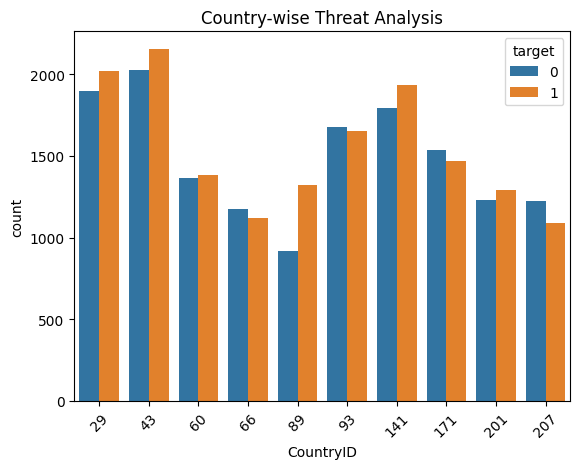

In [ ]:
top_10 = train_data['CountryID'].value_counts().head(10).index
sns.countplot(x='CountryID', hue='target', data=train_data[train_data['CountryID'].isin(top_10)])
plt.xticks(rotation=45)
plt.title('Country-wise Threat Analysis')
plt.show()


**Insights :**
* Country 43 has the highest number of system threats, possibly threats targeting this country.
* Countries 29 and 141 show a relatively balanced count of systems with and without threats.
* Country 207 has the lowest number of system threats making it lesser prone.

# Preprocessing Pipelines


**Dropping target column**

In [ ]:
x = train_data.drop(columns=['target'])
y = train_data['target']

**Identifying numerical and categorical columns**

In [ ]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
skewed_features = x[num_cols].skew()

In [ ]:
high_skewed_feat = ((skewed_features.abs()) > 0.5).index.tolist()
normally_dist_feat = ((skewed_features.abs()) <= 0.5).index.tolist()

In [ ]:
cardinality = x[cat_cols].nunique()
low_cardinal_feat = (cardinality <= 10).index.tolist()
med_cardinal_feat = ((cardinality > 10) & (cardinality < 50)).index.tolist()

In [ ]:
#for numerical columns for normally distributed applying median imputer with standard scaler
num_trans1 = Pipeline([
    ("imputer" ,SimpleImputer(strategy = "median")),
    ("standardScaler" , StandardScaler()),
    ("pca", PCA(n_components=0.99))
])

#for numerical columns for skewed features applying median imputer with minmax scaler
num_trans2 = Pipeline([
    ("imputer" , SimpleImputer(strategy="median")),
    ("minmaxScaler" , MinMaxScaler()),
    ("pca", PCA(n_components=0.99))
])

#for categorical columns with high cardinality applying most frequent imputer with label encoder
cat_trans1 = Pipeline([
    ("imputer" , SimpleImputer(strategy = "most_frequent")),
    ("labelEncoder" , OrdinalEncoder())
])

#for categorical columns with low cardinality applying most frequent imputer with one hot encoder
cat_trans2 = Pipeline([
    ("imputer" , SimpleImputer(strategy = "most_frequent")),
    ("onehotEncoder" , OneHotEncoder(handle_unknown="ignore"))
])


In [ ]:
preprocessor = ColumnTransformer([
    ("num_normal", num_trans1, normally_dist_feat),
    ("num_skewed", num_trans2, high_skewed_feat),
    ("cat_low_card", cat_trans2, low_cardinal_feat),
], remainder="passthrough")

**Train-test split**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Dummy model

In [ ]:
dummy_model = DummyClassifier().fit(x_train,y_train)
y_pred = dummy_model.predict(y_val)
print(accuracy_score(y_val , y_pred))

0.5061


# logistic regression

In [ ]:
lg_reg_pipeline = Pipeline([
    ("preprocess" , preprocessor),
    ("logistic_regression" , LogisticRegression(max_iter=2000))
])

lg_reg_pipeline.fit(x_train, y_train)

y_pred = lg_reg_pipeline.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.61005


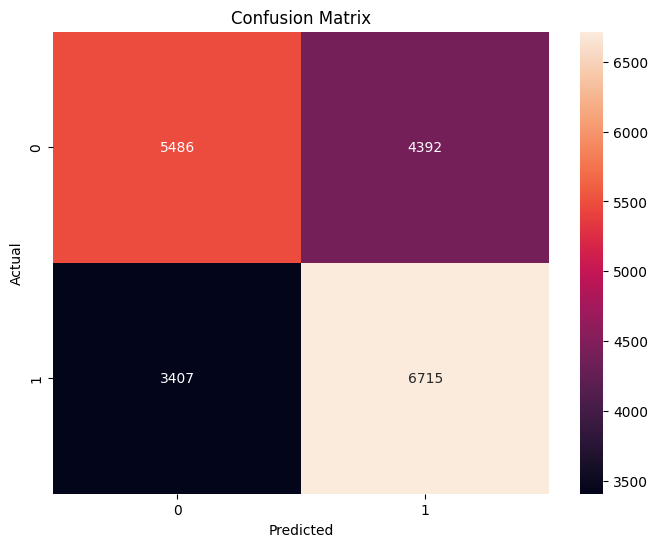

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,fmt='d', annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [ ]:
submission = pd.DataFrame({"id" : range(0 , test_data.shape[0]) , "target" : lg_reg_pipeline.predict(test_data) })
submission.to_csv('submission.csv' , index = False)
print(submission.head())
print("done")

   id  target
0   0       1
1   1       0
2   2       1
3   3       1
4   4       0
done


# SGD Classifier

In [ ]:
sgd_pipeline = Pipeline([
    ("preprocess" , preprocessor),
    ("sgd_classifier" , SGDClassifier(random_state=42))
])

sgd_pipeline.fit(x_train , y_train)

y_pred = sgd_pipeline.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.609


# Hyper parameter tuning for SGD Classifier

In [ ]:
sgd_pipeline.named_steps['sgd_classifier'].get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'sgd_classifier__loss': ['hinge', 'log_loss'],
    'sgd_classifier__penalty': ['l1', 'l2'],
    'sgd_classifier__alpha': [0.0001, 0.01],
    'sgd_classifier__max_iter': [500, 1000],
    'sgd_classifier__learning_rate': ['constant', 'adaptive'],
    'sgd_classifier__eta0': [0.01, 0.1],
}


In [ ]:
grid_search = GridSearchCV(sgd_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_normal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardScaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['IsBetaUser',
                                                                          'RealTimeProtectionState',
                                                                          'IsPassiveModeEnabled',
                                                                          'AntivirusConfigID',
                                                                          'NumAntiv...
                                                                          'DateOS'])])),
                                       ('sgd_classifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'sgd_classifier__alpha': [0.0001, 0.01],
                         'sgd_classifier__eta0': [0.01, 0.1],
                         'sgd_classifier__learning_rate': ['constant',
                                                           'adaptive'],
                         'sgd_classifier__loss': ['hinge', 'log_loss'],
                         'sgd_classifier__max_iter': [500, 1000],
                         'sgd_classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
sgd_y_pred = grid_search.predict(x_val )
accuracy_score(y_val ,sgd_y_pred)

0.61545

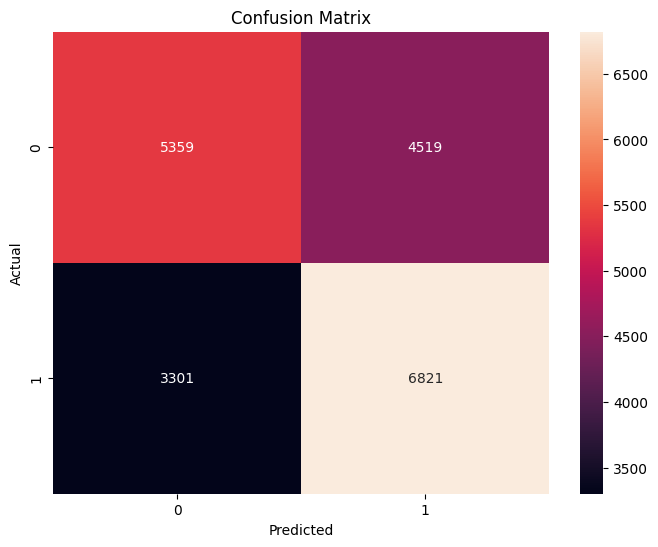

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,fmt='d', annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

# light gbm

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lgbm', LGBMClassifier(random_state=42 ))
])


pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_val)

accuracy_score(y_val, y_pred)

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21768
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151


0.62065

# Hyperparameter tuning for Light GBM

In [ ]:
param_grid = {'lgbm__n_estimators': [500 , 600],
     'lgbm__learning_rate': [0.04 , 0.05],
     'lgbm__max_depth': [7 , 8],
     'lgbm__num_leaves': [30 , 32],
     'lgbm__min_child_samples': [50 , 70],
     'lgbm__subsample': [0.9 , 1.0],
     'lgbm__colsample_bytree': [0.7 , 0.8],
     'lgbm__reg_alpha': [0.002 , 0.005],
     'lgbm__reg_lambda': [1.5 , 2]
}

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline, param_grid, n_iter=10, cv=3, scoring="accuracy", n_jobs=-1, verbose=2
)

random_search.fit(x_train, y_train)


y_pred = random_search.predict(x_val)

accuracy_score(y_val, y_pred)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20090
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1443
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

0.62205

In [ ]:
submission = pd.DataFrame({"id" : range(0 , test_data.shape[0]) , "target" : random_search.predict(test_data) })
submission.to_csv('submission.csv' , index = False)
print(submission.head())
print("done")

   id  target
0   0       1
1   1       1
2   2       1
3   3       1
4   4       0
done


In [ ]:
submission = pd.DataFrame({"id" : range(0 , test_data.shape[0]) , "target" : random_search.predict(test_data) })
submission.to_csv('submission.csv' , index = False)
print(submission.head())
print("done")

   id  target
0   0       1
1   1       1
2   2       1
3   3       1
4   4       0
done
